# CNN for acoustic scene classfication: my life environment

Date: March 20, 2019

Neural network: input MFSCs to CNN

Location: Yokohama, Japan

## Preparing data set for CNN

In [43]:
DATASET_FOLDER = '../dataset/data_environment'

%run ../oscilloscope/script/dataset.py
%matplotlib inline

ds = DataSet(DATASET_FOLDER)
train_data, train_labels, test_data, test_labels = ds.generate(update=True)['mfsc']
ds.class_labels

['silence',
 'train',
 'station',
 'fastfood',
 'escalator',
 'mall',
 'ship',
 'mall2']

'train'

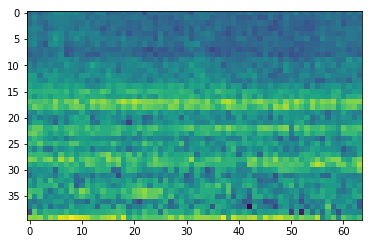

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(np.rot90(train_data[13].reshape(ds.shape)))
train_data.shape, test_data.shape
ds.class_labels[np.argmax(train_labels[13])]

### CNN model

In [45]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(*ds.shape, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(len(ds.class_labels), activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 62, 38, 8)         80        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 19, 8)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 31, 19, 8)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 17, 16)        1168      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 8, 16)         0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 8, 16)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 6, 32)         4640      
__________

In [46]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## Training CNN

In [47]:
EPOCHS = 50
history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_data=(test_data, test_labels))

Train on 1120 samples, validate on 480 samples
Epoch 1/50
1120/1120 [==============================] - 38s 34ms/step - loss: 1.7863 - acc: 0.3357 - val_loss: 1.4758 - val_acc: 0.5354
Epoch 2/50
1120/1120 [==============================] - 36s 32ms/step - loss: 1.3315 - acc: 0.5143 - val_loss: 1.2616 - val_acc: 0.5458
Epoch 3/50
1120/1120 [==============================] - 36s 32ms/step - loss: 1.1714 - acc: 0.5652 - val_loss: 1.0703 - val_acc: 0.6396
Epoch 4/50
1120/1120 [==============================] - 35s 31ms/step - loss: 1.0222 - acc: 0.6214 - val_loss: 0.9173 - val_acc: 0.7396
Epoch 5/50
1120/1120 [==============================] - 35s 31ms/step - loss: 0.9140 - acc: 0.6625 - val_loss: 0.8024 - val_acc: 0.7646
Epoch 6/50
1120/1120 [==============================] - 36s 32ms/step - loss: 0.8142 - acc: 0.7063 - val_loss: 0.7260 - val_acc: 0.8125
Epoch 7/50
1120/1120 [==============================] - 36s 32ms/step - loss: 0.7141 - acc: 0.7420 - val_loss: 0.5890 - val_acc: 0.8187
E

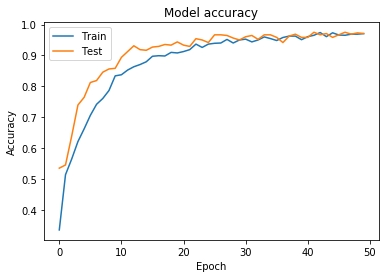

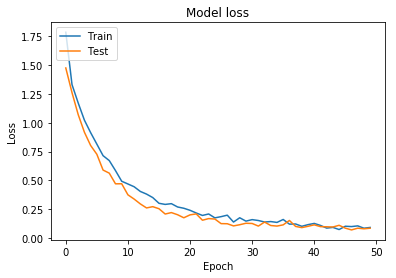

In [48]:
plot_accuracy(history)
plot_loss(history)

## Save the model

In [49]:
import datetime

dt = datetime.datetime.today().strftime('%Y%m%d%H%M%S')
filename = DATASET_FOLDER + '/my_life_environment_cnn_{}.h5'.format(dt)
model.save(filename)

## Load the model

In [50]:
del model
model = models.load_model(filename)

## Confirmation

In [51]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_data)

In [52]:
ds.class_labels

['silence',
 'train',
 'station',
 'fastfood',
 'escalator',
 'mall',
 'ship',
 'mall2']

In [53]:
(activations[-1][:10]*100).astype(int)

array([[  0,   0,   0,   2,   0,   0,   0,  97],
       [  0,   0,   0,  99,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  99,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  99],
       [100,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  99,   0],
       [  0,   0,   0,   0,   0,  99,   0,   0],
       [100,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  99,   0],
       [  0,   0,   8,  85,   0,   0,   0,   5]])

In [54]:
test_labels[:10].astype(int)

array([[0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]])

'mall2'

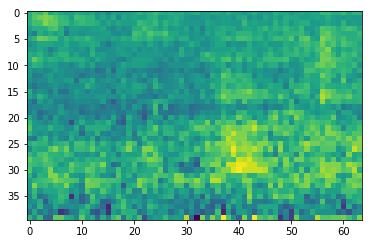

In [68]:
image_number = 56

plt.imshow(np.rot90(test_data[image_number,:,:,0]))
ds.class_labels[np.argmax(test_labels[image_number])]

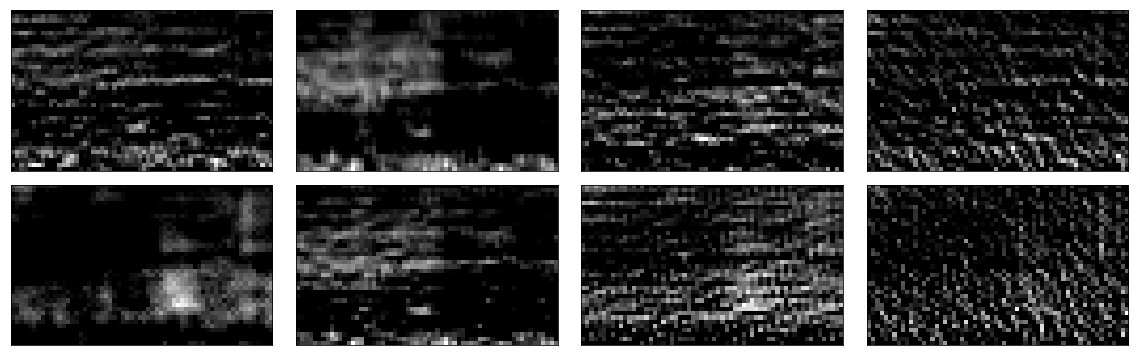

In [69]:
plot_layer(activations, image_number, 0, 4)

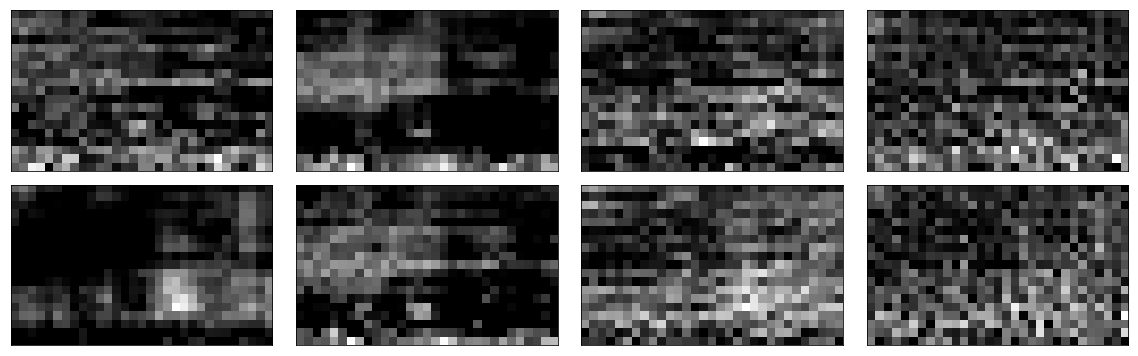

In [70]:
plot_layer(activations, image_number, 1, 4)

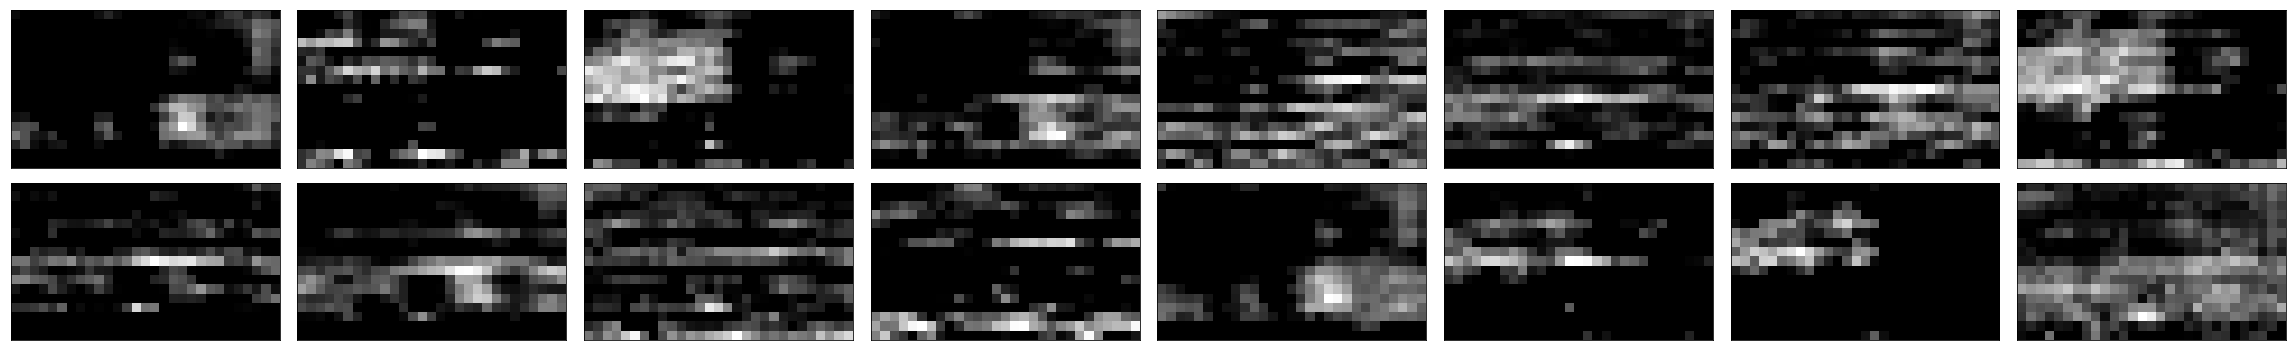

In [71]:
plot_layer(activations, image_number, 3, 8)

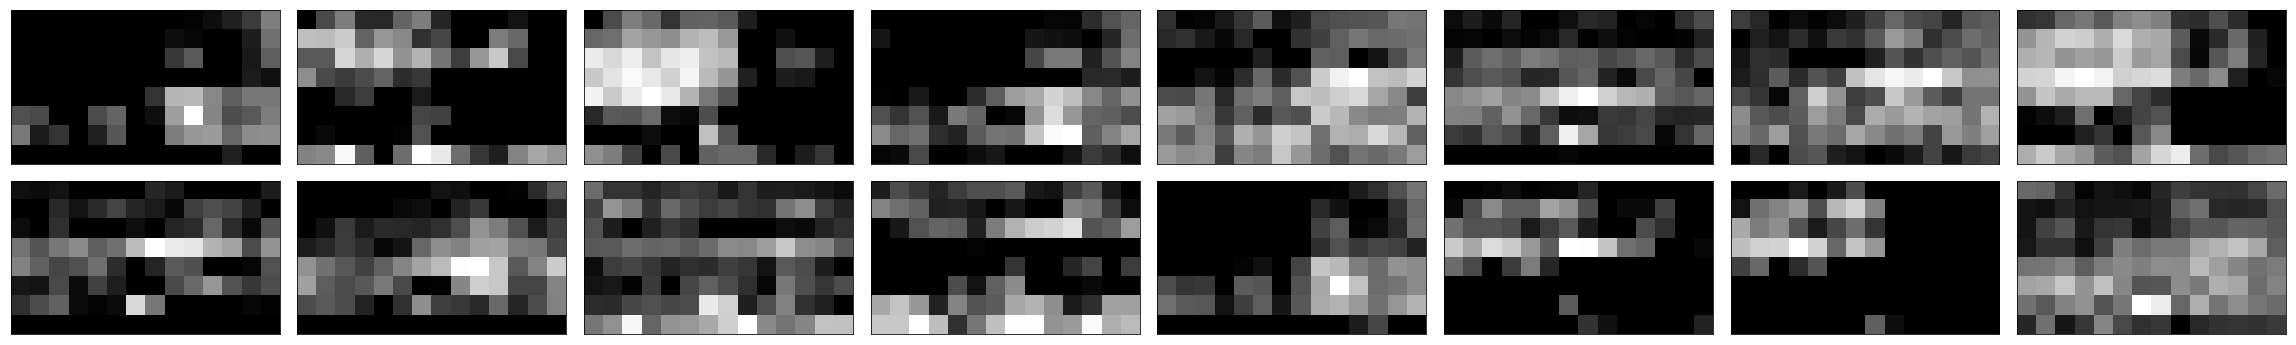

In [72]:
plot_layer(activations, image_number, 4, 8)

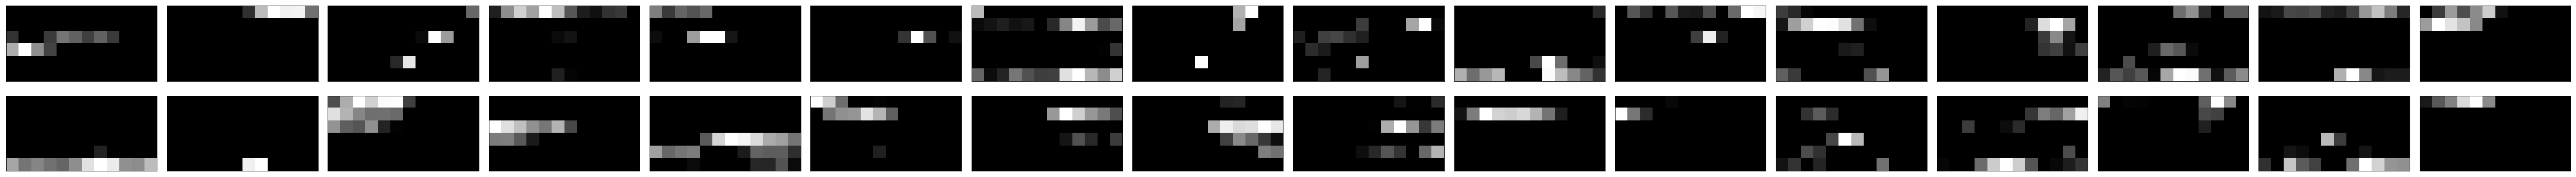

In [73]:
plot_layer(activations, image_number, 6, 16)

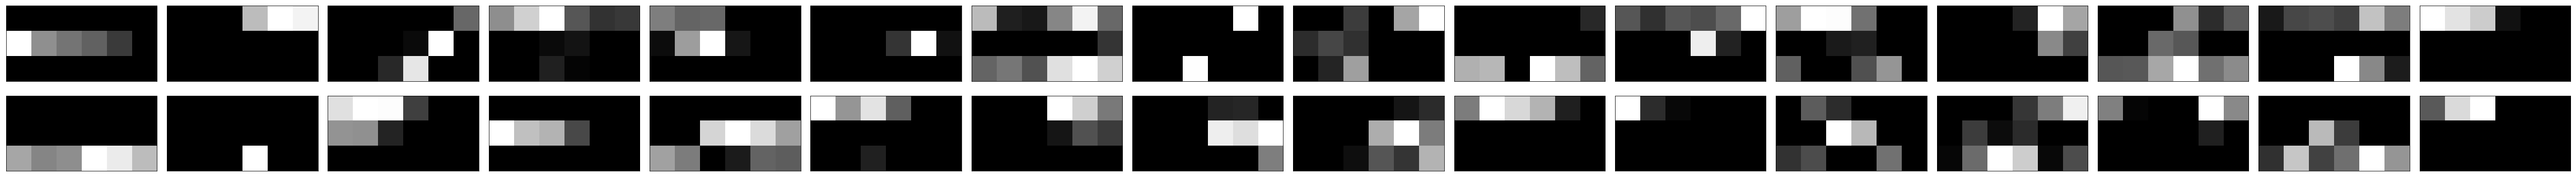

In [74]:
plot_layer(activations, image_number, 7, 16)